In [12]:
import numpy as np
import pandas as pd
import re
from pathlib import Path
import math
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import seaborn as sns


# Summary of This Notebook

- This notebook contains an investigation into the average number of visitors across various libraries using a dataset named "Analyez."The dataset includes information on library branches, years, months, circulation, computer sessions, and visitors.

The notebook performs the following analyses:

1. Grouping Data and Calculating Branch Visitor Counts:
This notebook groups the data by library branch and calculates the total count of visitors for each branch. The result is stored in the DataFrame "branch_counts," which includes two columns: "BRANCH" (branch name) and "VISITORS" (total count of visitors for each branch).

2. Creating Scatter Plots:
This notebook creates individual scatter plots to compare the relationships between numerical variables, including "CIRCULATION," "COMPUTER_SESSIONS," and "VISITORS." Each scatter plot represents one combination of variables, allowing exploration of potential correlations or patterns.

3. Examining Changes in Metrics Over Time:
This notebook calculates the sum of metrics (CIRCULATION, COMPUTER_SESSIONS, and VISITORS) for each year and visualizes their trends over time using a line plot. This analysis helps understand how these metrics have changed over the years.

4. Calculating Average Visitors for Specific Branches and Years:
This notebook calculates the average number of visitors for specific library branches in particular years. It groups the data by both "BRANCH" and "YEAR" and calculates the mean number of visitors for each branch and year combination.

5. Analyzing Monthly Visitor Patterns:
This notebook converts the "YEAR" and "MONTH" columns to a datetime format to analyze monthly visitor patterns. It groups the data by date and calculates the mean number of visitors for each month. The result is then plotted to visualize the average monthly visitors for all library branches.

Overall, the notebook provides a comprehensive analysis of the average number of visitors across different library branches over time, including yearly and monthly trends. It explores potential correlations between library metrics and presents insights into branch performance and visitor patterns throughout the dataset.

1) Read the dataset

In [13]:
Analyez = pd.read_csv('../can-summer-2023/data/clean/branch_metrics.csv')
Analyez

BRANCH  YEAR  MONTH  CIRCULATION  COMPUTER_SESSIONS  \
0             Albany Park  2011      1       8427.0             1666.0   
1             Albany Park  2011      2       7023.0             1296.0   
2             Albany Park  2011      3       9702.0             1735.0   
3             Albany Park  2011      4       9344.0             1841.0   
4             Albany Park  2011      5       8865.0             1683.0   
...                   ...   ...    ...          ...                ...   
11875  Wrightwood-Ashburn  2022     12        575.0              511.0   
11876  Wrightwood-Ashburn  2023      1        658.0              577.0   
11877  Wrightwood-Ashburn  2023      2        683.0              561.0   
11878  Wrightwood-Ashburn  2023      3        834.0              806.0   
11879  Wrightwood-Ashburn  2023      4       1038.0              757.0   

       VISITORS  
0        9604.0  
1       10500.0  
2        9050.0  
3        9300.0  
4        8271.0  
...         ...  
11875    1410.0  
11876    1625.0  
11877   12146.0  
11878    6312.0  
11879    4074.0  

[11880 rows x 6 columns]

a. Here I calculated the counts for each branch by adding all visitors for each branch over the years 2011-2023(April? or May??).


In [14]:
branch_counts = Analyez[["BRANCH", "VISITORS"]].groupby('BRANCH').sum().reset_index()
#branch_counts.columns = ["BRANCH", "COUNT"]
branch_counts

BRANCH   VISITORS
0             Albany Park  1224086.0
1                 Altgeld   530982.0
2          Archer Heights  1085155.0
3                  Austin   879538.0
4           Austin-Irving  1226173.0
..                    ...        ...
77           West Pullman   925574.0
78              West Town  1341443.0
79  Whitney M. Young, Jr.   936389.0
80       Woodson Regional  2890069.0
81     Wrightwood-Ashburn   714747.0

[82 rows x 2 columns]

b. Creating individual scatter plots:

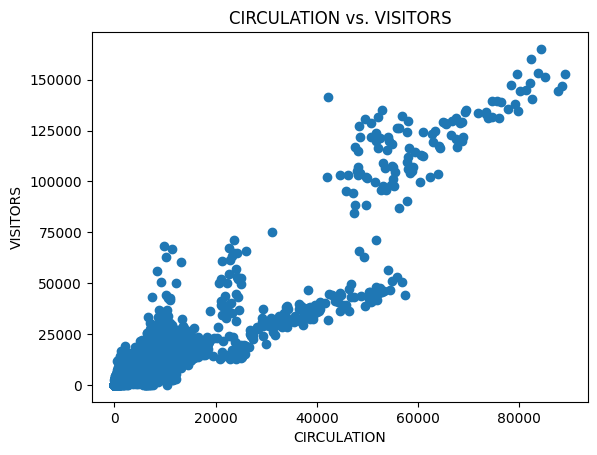

In [15]:

# Select the numerical variables for scatter plots
variables = ['CIRCULATION', 'COMPUTER_SESSIONS', 'VISITORS']

# Create individual scatter plots
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        plt.scatter(Analyez[variables[i]], Analyez[variables[j]])
        plt.xlabel(variables[i])
        plt.ylabel(variables[j])
        plt.title(f'{variables[i]} vs. {variables[j]}')
        plt.show()


c. Examine the changes in metrics over time:
- The following code calculates the sum of metrics (CIRCULATION, COMPUTER_SESSIONS, and VISITORS) for each year and visualizes the trends over time using a line plot.

In [16]:
# Line plot of circulation, computer sessions, and visitors over time
metrics_over_time = Analyez.groupby('YEAR').sum()

plt.plot(metrics_over_time.index, metrics_over_time['CIRCULATION'], label='Circulation')
plt.plot(metrics_over_time.index, metrics_over_time['COMPUTER_SESSIONS'], label='Computer Sessions')
plt.plot(metrics_over_time.index, metrics_over_time['VISITORS'], label='Visitors')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Sum of Metrics by Year')
plt.legend()
plt.show()


In [17]:
# Calculate the average of visitors over each year per branch
average_visitors_per_year_per_branch = Analyez.groupby(['BRANCH', 'YEAR'])['VISITORS'].mean()

# Print the result
print(average_visitors_per_year_per_branch)

BRANCH              YEAR
Albany Park         2011     9785.416667
                    2012     6540.416667
                    2013       35.083333
                    2014     4426.333333
                    2015    12812.583333
                                ...     
Wrightwood-Ashburn  2019     3946.083333
                    2020     1778.166667
                    2021     1022.833333
                    2022     2470.666667
                    2023     6039.250000
Name: VISITORS, Length: 1044, dtype: float64


In [18]:
# Specify the branch and year of interest
branch_of_interest = 'Wrightwood-Ashburn'
year_of_interest = 2022

# Filter the data for the specific branch and year
filtered_data = Analyez.loc[(Analyez['BRANCH'] == branch_of_interest) & (Analyez['YEAR'] == year_of_interest)]

# Calculate the average number of visitors
average_visitors = filtered_data['VISITORS'].mean()

print(f"The average number of visitors for {branch_of_interest} in {year_of_interest} is: {average_visitors:.2f}")


The average number of visitors for Wrightwood-Ashburn in 2022 is: 2470.67


In [19]:
# Specify the branch and year of interest
branch_of_interest = 'Albany Park'
year_of_interest = 2023

# Filter the data for the specific branch and year
filtered_data = Analyez.loc[(Analyez['BRANCH'] == branch_of_interest) & (Analyez['YEAR'] == year_of_interest)]

# Calculate the average number of visitors
average_visitors = filtered_data['VISITORS'].mean()

print(f"The average number of visitors for {branch_of_interest} in {year_of_interest} is: {average_visitors:.2f}")


The average number of visitors for Albany Park in 2023 is: 6896.50


In [20]:
print(Analyez.head())


        BRANCH  YEAR  MONTH  CIRCULATION  COMPUTER_SESSIONS  VISITORS
0  Albany Park  2011      1       8427.0             1666.0    9604.0
1  Albany Park  2011      2       7023.0             1296.0   10500.0
2  Albany Park  2011      3       9702.0             1735.0    9050.0
3  Albany Park  2011      4       9344.0             1841.0    9300.0
4  Albany Park  2011      5       8865.0             1683.0    8271.0


2. Analyze monthly patterns of visitors:

<Axes: title={'center': 'Average of Vistors of All Branches'}, xlabel='Date', ylabel='Average Visitors'>

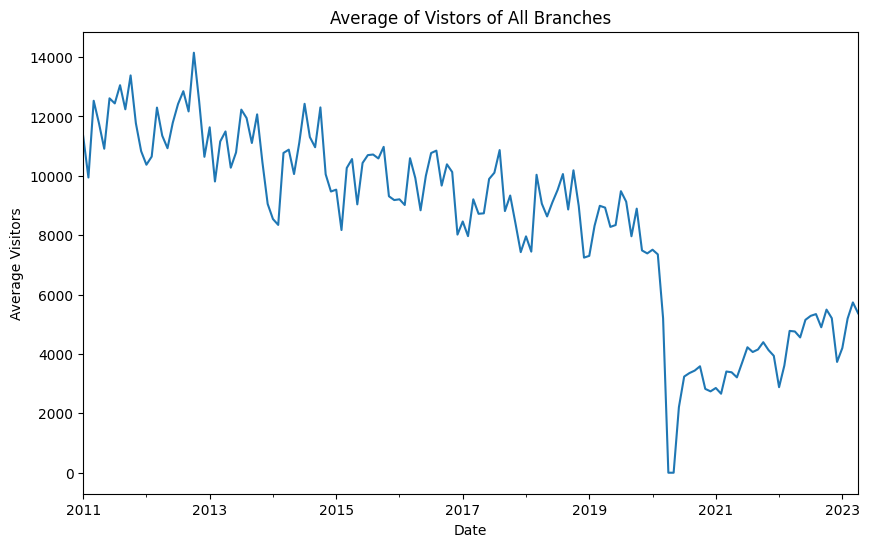

In [21]:

# Convert the 'YEAR' and 'MONTH' columns to a datetime format
Analyez['DATE'] = pd.to_datetime(Analyez[['YEAR', 'MONTH']].assign(DAY=1))

# Group the data by 'DATE' and calculate the mean number of visitors
monthly_visitors = Analyez.groupby('DATE')['VISITORS'].mean()

# Plot the monthly visitor patterns
monthly_visitors.plot(figsize=(10, 6), xlabel='Date', ylabel='Average Visitors', title ='Average of Vistors of All Branches')
 


<Axes: title={'center': 'Average of Vistors for All Open Branches'}, xlabel='Date', ylabel='Average Visitors'>

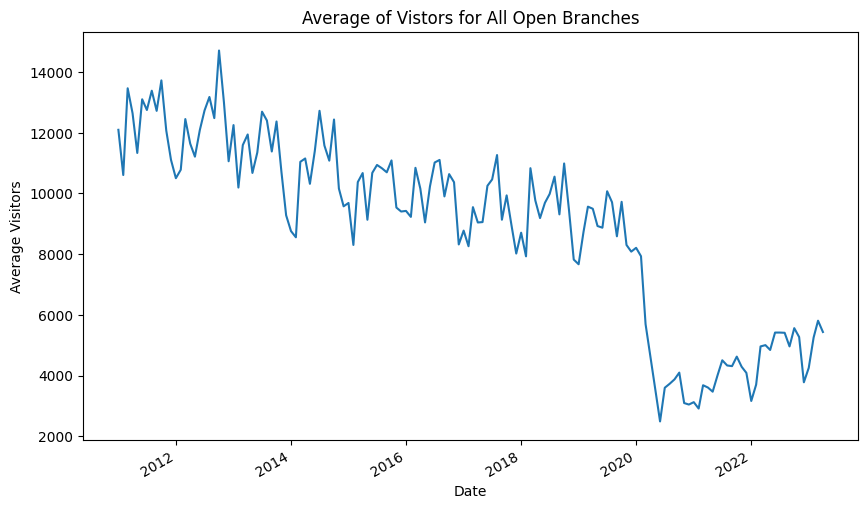

In [22]:
# Convert the 'YEAR' and 'MONTH' columns to a datetime format
Analyez['DATE'] = pd.to_datetime(Analyez[['YEAR', 'MONTH']].assign(DAY=1))

nonzero_libraries = Analyez[(Analyez['VISITORS'] > 0) & (Analyez['COMPUTER_SESSIONS'] > 0)]
nonzero_libraries


# Group the data by 'DATE' and calculate the mean number of visitors
monthly_visitors_nonzero = nonzero_libraries.groupby('DATE')['VISITORS'].mean()

# Plot the monthly visitor patterns
monthly_visitors_nonzero.plot(figsize=(10, 6), xlabel='Date', ylabel='Average Visitors', title ='Average of Vistors for All Open Branches')
 


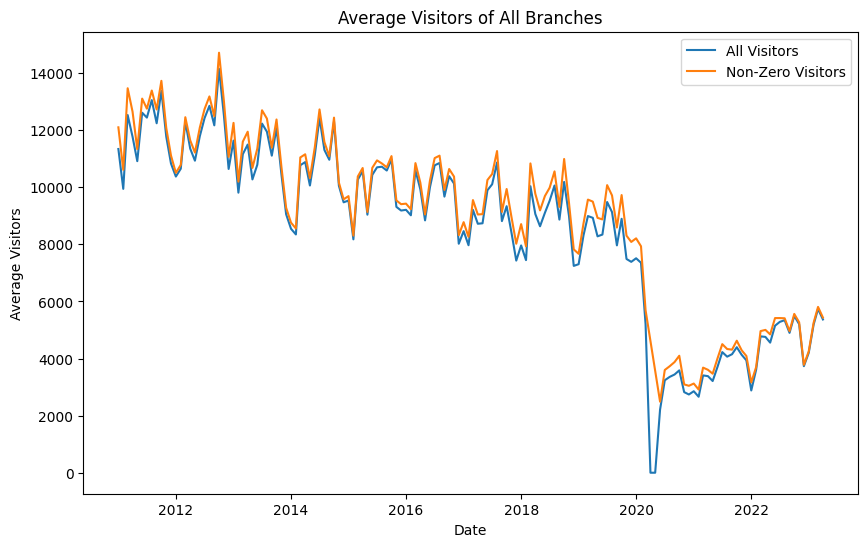

In [23]:

# Plot the monthly visitor patterns on one graph
plt.figure(figsize=(10, 6))
plt.plot(monthly_visitors.index, monthly_visitors.values, label='All Visitors')
plt.plot(monthly_visitors_nonzero.index, monthly_visitors_nonzero.values, label='Non-Zero Visitors')
plt.xlabel('Date')
plt.ylabel('Average Visitors')
plt.title('Average Visitors of All Branches')
plt.legend()
plt.show()



In [24]:
monthly_visitors.index
len(monthly_visitors)

148

In [25]:
monthly_visitors_nonzero.index

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01',
               ...
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01'],
              dtype='datetime64[ns]', name='DATE', length=146, freq=None)

In [26]:
Analyez.groupby('DATE')['VISITORS'].mean()

DATE
2011-01-01    11338.164557
2011-02-01     9942.164557
2011-03-01    12527.037975
2011-04-01    11768.189873
2011-05-01    10912.303797
                  ...     
2022-12-01     3731.555556
2023-01-01     4200.765432
2023-02-01     5190.234568
2023-03-01     5735.703704
2023-04-01     5367.827160
Name: VISITORS, Length: 148, dtype: float64

- Here I Converted the 'YEAR' and 'MONTH' columns to a datetime format and then I Grouped the data by 'DATE' and calculate the mean number of visitors to see the avergages of visitors for each year



3. What was the month-year pair with the highest average with the highest average number of visitors?

In [27]:
max_visitors_month = monthly_visitors.idxmax().strftime('%B %Y')
print(f"The month with the highest average number of visitors was {max_visitors_month}.")


The month with the highest average number of visitors was October 2012.


4. What branch had the highest number of visitors in a specific month?

In [43]:
import pandas as pd

def find_branch_with_max_visitors(year, month, data):
    # Filter the data for the specified year and month
    selected_data = data[(data['YEAR'] == year) & (data['MONTH'] == month)]
    
    # Find the index of the row with the maximum number of visitors
    max_visitors_idx = selected_data['VISITORS'].idxmax()
    
    # Get the name of the branch with the maximum number of visitors
    branch_with_max_visitors = selected_data.loc[max_visitors_idx, 'BRANCH']
    
    return f"The branch with the highest number of visitors in {year}-{month:02d} was {branch_with_max_visitors}."

# Example usage
year = 2023
month = 1
result = find_branch_with_max_visitors(year, month, Analyez)
print(result)


The branch with the highest number of visitors in 2023-01 was Harold Washington Library Center.


5. How does the average number of visitors change over the years?

<Axes: title={'center': 'Visitors Average Change Over the Years'}, xlabel='Year', ylabel='Average Visitors'>

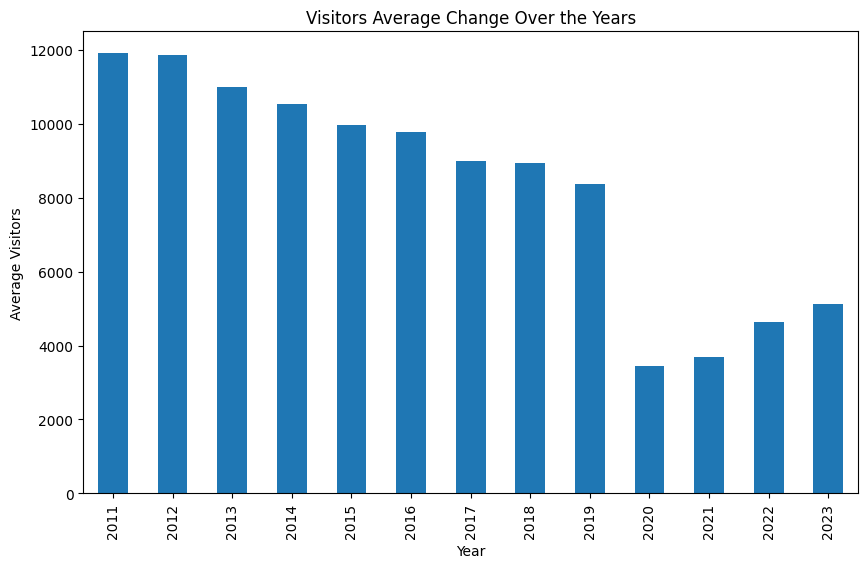

In [29]:
# Group the data by 'YEAR' and calculate the mean number of visitors
yearly_visitors = Analyez.groupby('YEAR')['VISITORS'].mean()

# Plot the average number of visitors over the years
yearly_visitors.plot(kind='bar', figsize=(10, 6), xlabel='Year', ylabel='Average Visitors', title='Visitors Average Change Over the Years')


6. Are there any seasonal patterns in the number of visitors?

<Axes: title={'center': 'Monthly Average Visitors'}, xlabel='Month', ylabel='Average Visitors'>

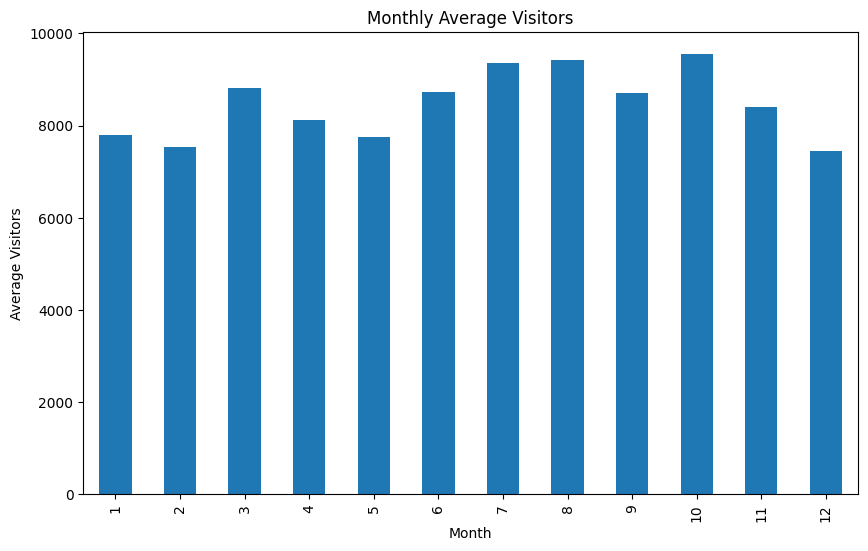

In [30]:
# Extract the month from the 'DATE' column
Analyez['MONTH'] = pd.to_datetime(Analyez['DATE']).dt.month

# Group the data by 'MONTH' and calculate the average number of visitors
monthly_avg_visitors = Analyez.groupby('MONTH')['VISITORS'].mean()

# Plot the average number of visitors by month
monthly_avg_visitors.plot(kind='bar', figsize=(10, 6), xlabel='Month', ylabel='Average Visitors', title='Monthly Average Visitors')


7. How does the number of visitors vary across different branches?

<Axes: title={'center': 'Average of Visitors by Branch'}, xlabel='Branch', ylabel='Total Visitors'>

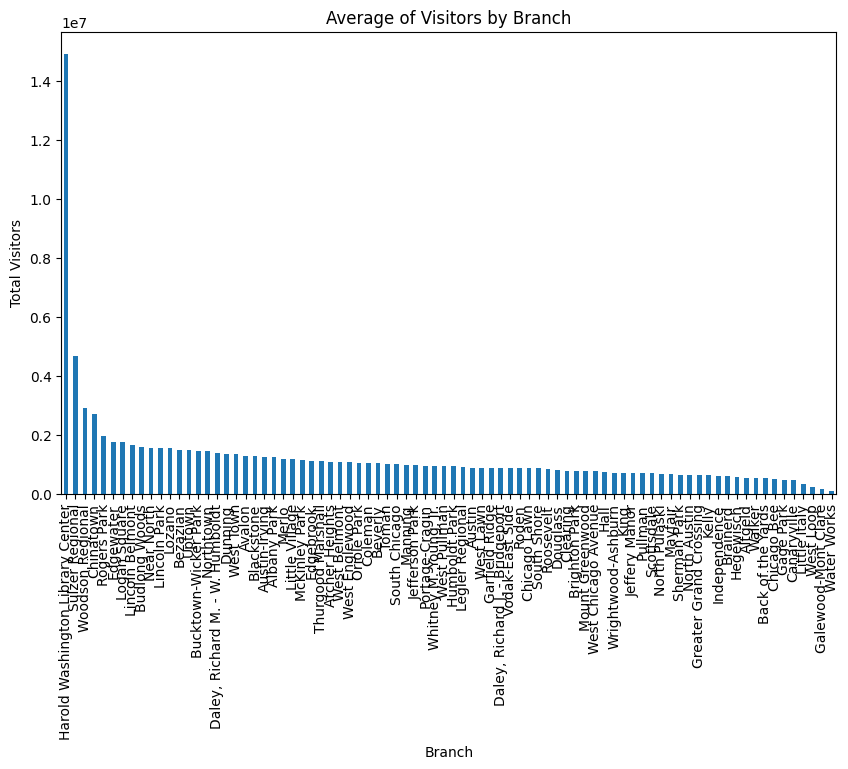

In [31]:
# Group the data by 'BRANCH' and calculate the total number of visitors
branch_total_visitors = Analyez.groupby('BRANCH')['VISITORS'].sum()

# Sort the branches based on the total number of visitors in descending order
sorted_branches = branch_total_visitors.sort_values(ascending=False)

# Plot the total number of visitors by branch
sorted_branches.plot(kind='bar', figsize=(10, 6), xlabel='Branch', ylabel='Total Visitors', title='Average of Visitors by Branch')


8. Is there a correlation between the number of computer sessions and the number of visitors?

In [32]:
# Calculate the correlation coefficient between 'COMPUTER_SESSIONS' and 'VISITORS'
correlation = Analyez['COMPUTER_SESSIONS'].corr(Analyez['VISITORS'])

print(f"The correlation coefficient between computer sessions and visitors is: {correlation}")


The correlation coefficient between computer sessions and visitors is: 0.9407945380919744


9. Is there a difference in visitor patterns between weekdays and weekends?

<Axes: title={'center': 'Average Number of Visitors for Day of Week'}, xlabel='Day of Week', ylabel='Average Visitors'>

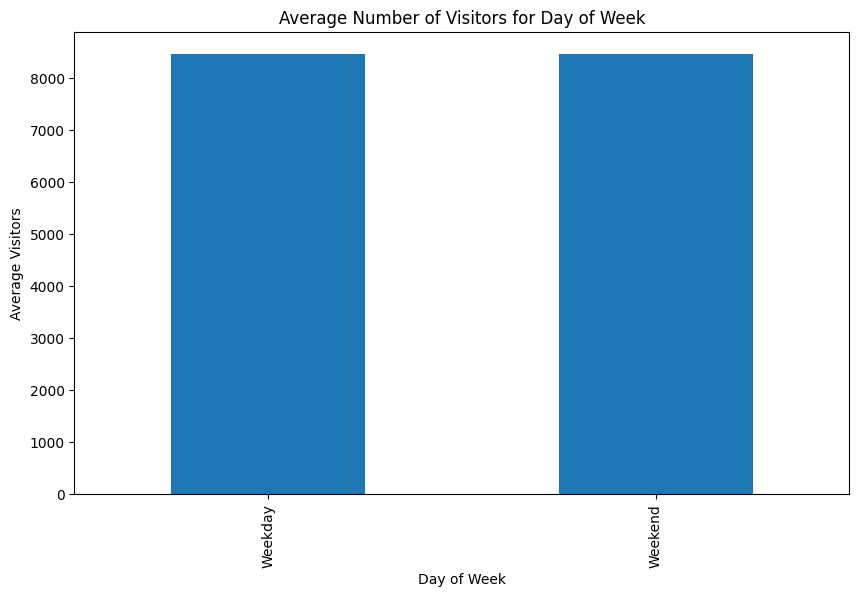

In [33]:
# Extract the day of the week from the 'DATE' column
Analyez['DAY_OF_WEEK'] = pd.to_datetime(Analyez['DATE']).dt.dayofweek

# Create a new column 'WEEKDAY' to differentiate between weekdays (0-4) and weekends (5-6)
Analyez['WEEKDAY'] = Analyez['DAY_OF_WEEK'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Group the data by 'WEEKDAY' and calculate the average number of visitors
weekday_avg_visitors = Analyez.groupby('WEEKDAY')['VISITORS'].mean()

# Plot the average number of visitors for weekdays and weekends
weekday_avg_visitors.plot(kind='bar', figsize=(10, 6), xlabel='Day of Week', ylabel='Average Visitors', title= 'Average Number of Visitors for Day of Week')


10. How does the number of visitors vary across different years for a specific branch?

<Axes: title={'center': 'Average of Visitors of Wrightwood-Ashburn Branch Over the Years'}, xlabel='Year', ylabel='Total Visitors'>

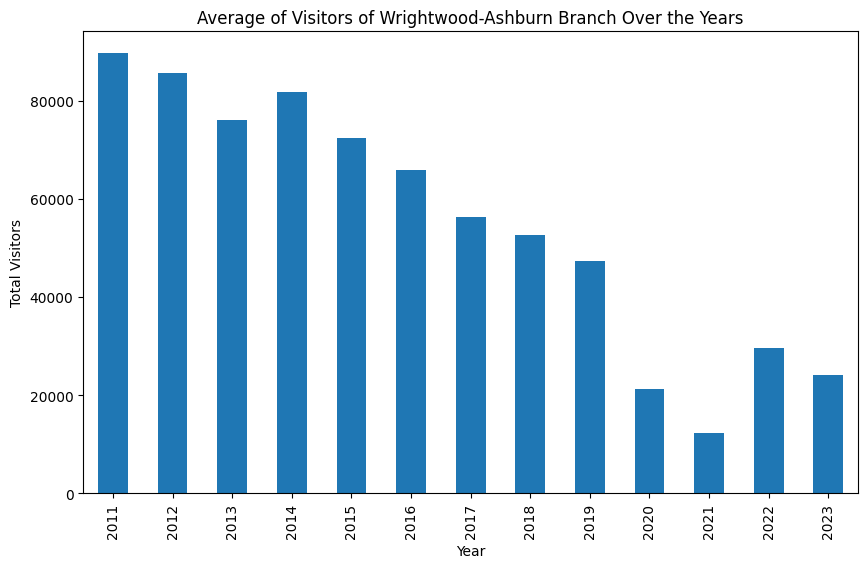

In [34]:
# Choose a specific branch for analysis (e.g., 'Albany Park')
selected_branch = 'Wrightwood-Ashburn'

# Filter the data for the selected branch
branch_data = Analyez[Analyez['BRANCH'] == selected_branch]

# Group the filtered data by 'YEAR' and calculate the total number of visitors
yearly_visitors_branch = branch_data.groupby('YEAR')['VISITORS'].sum()

# Plot the total number of visitors for the selected branch by year
yearly_visitors_branch.plot(kind='bar', figsize=(10, 6), xlabel='Year', ylabel='Total Visitors', title='Average of Visitors of Wrightwood-Ashburn Branch Over the Years')


In [35]:
library_branches = Analyez[['BRANCH','VISITORS']]
library_branches.head()

BRANCH  VISITORS
0  Albany Park    9604.0
1  Albany Park   10500.0
2  Albany Park    9050.0
3  Albany Park    9300.0
4  Albany Park    8271.0

In [36]:
library_branches = Analyez[['BRANCH','VISITORS']]
library_branches.tail()

BRANCH  VISITORS
11875  Wrightwood-Ashburn    1410.0
11876  Wrightwood-Ashburn    1625.0
11877  Wrightwood-Ashburn   12146.0
11878  Wrightwood-Ashburn    6312.0
11879  Wrightwood-Ashburn    4074.0

In [37]:
locations = pd.read_csv('../data/clean/branches.csv')
locations

FileNotFoundError: [Errno 2] No such file or directory: '../data/clean/branches.csv'

In [38]:
Analyez = Analyez.merge(locations)
Analyez

NameError: name 'locations' is not defined

In [39]:
# Extract latitude and longitude from the "LOCATION" column
locations['LATITUDE'] = locations['LOCATION'].apply(lambda x: float(x.split(',')[0].strip('()')))
locations['LONGITUDE'] = locations['LOCATION'].apply(lambda x: float(x.split(',')[1].strip('()')))

# Display the updated DataFrame with latitude and longitude columns
print(locations[['BRANCH', 'LATITUDE', 'LONGITUDE']])

NameError: name 'locations' is not defined

In [40]:
import folium

In [41]:
# Create a folium map centered on Chicago
map_chicago = folium.Map(location=[41.657198, -87.598838], zoom_start=10)

# Add markers for each branch
for _, location in locations.iterrows():
    branch = location['BRANCH']
    latitude = location['LATITUDE']
    longitude = location['LONGITUDE']
    
    marker = folium.Marker(location=[latitude, longitude], popup=branch)
    #marker = folium.Marker(location=[latitude, longitude])
    marker.add_to(map_chicago)

# Display the map
map_chicago

NameError: name 'locations' is not defined

In [42]:
branch_counts.head()


BRANCH   VISITORS
0     Albany Park  1224086.0
1         Altgeld   530982.0
2  Archer Heights  1085155.0
3          Austin   879538.0
4   Austin-Irving  1226173.0